# Introduction

**Kelompok 01 - Final Project 4 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. Putu Wahyu Kusuma Wardhana<br>
PYTN-KS05-001

2. Muhammad Rezky Hamesi Akhyar<br>
PYTN-KS05-007

## Project Overview

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.

Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Import Library

In [ ]:
import os
import pandas as pd
import numpy as np # linear algebra

import missingno as msn

from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

# Load Dataset

**Mengambil dengan menggunakan API dan simpan dalam bentuk csv.**

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'putuwahyukusumaw29'
os.environ['KAGGLE_KEY'] = 'bafa7539f1cdd0e95dd9704c84871a2b'

In [ ]:
!kaggle datasets download -d arjunbhasin2013/ccdata

ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Ekstrak File berbentuk ZIP
from zipfile import ZipFile

file_name = "/content/ccdata.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


**Baca dataset dari file CSV**

In [ ]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Dimensi dataset**

In [ ]:
df.shape

(8950, 18)

Terdapat 8950 baris and 18 fitur / kolom pada dataset.

# Exploratory Data Analysis

## Basic Exploration

**Info Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan info diatas, terdapat beberapa hal yang didapatkan yaitu :

- Dataset ini memiliki dua jenis tipe data, 1 Categorical ( object ) dan 17 Numerical ( int dan float ).
- Masih ada missing values pada fitur "Credit_Limit" dan "Minimum_Payments".

**Cek Duplikat** 

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset

**Cek Nilai Null**

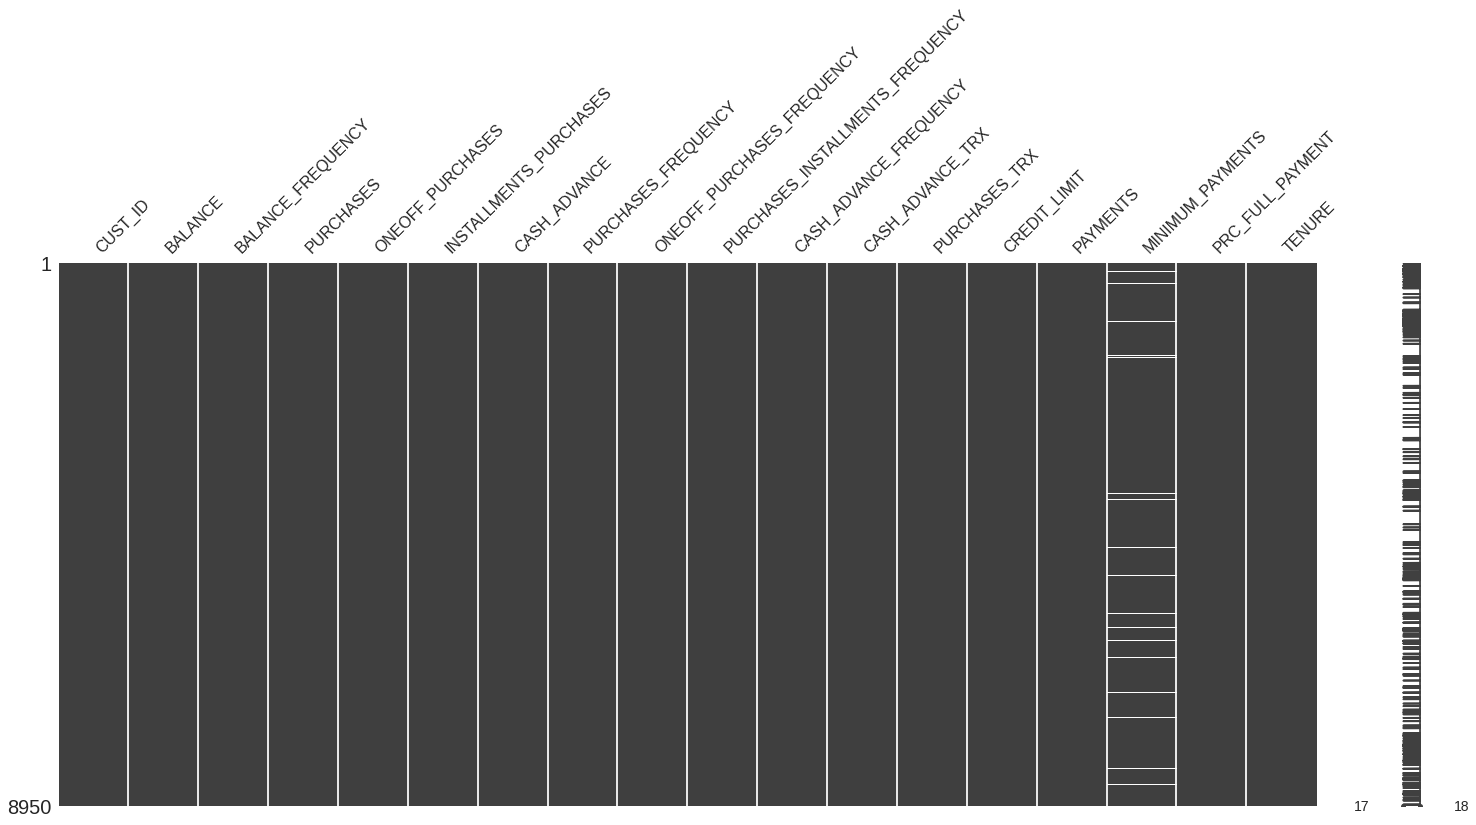

In [ ]:
msn.matrix(df)

In [ ]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
CUST_ID,0,0.0
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0


Berdasarkan visualisasi dan output missing values, pada fitur 'MINIMUM_PAYMENTS" memiliki jumlah missing value sebesar 3% (313 dari 8950). Selain itu, terdapat 1 missing value pada fitur "CREDIT_LIMIT."

## Numerical Features Exploration

**Memisahkan fitur categorical untuk visualisasi**

In [ ]:
X = df.drop('CUST_ID', axis=1)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Descriptive Analytics**

In [ ]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Tabel diatas berisi jumlah, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil (Q1,Q2,Q3) dari masing - masing fitur atau kolom dengan tipe numerik pada dataset.

### Univariate Analysis

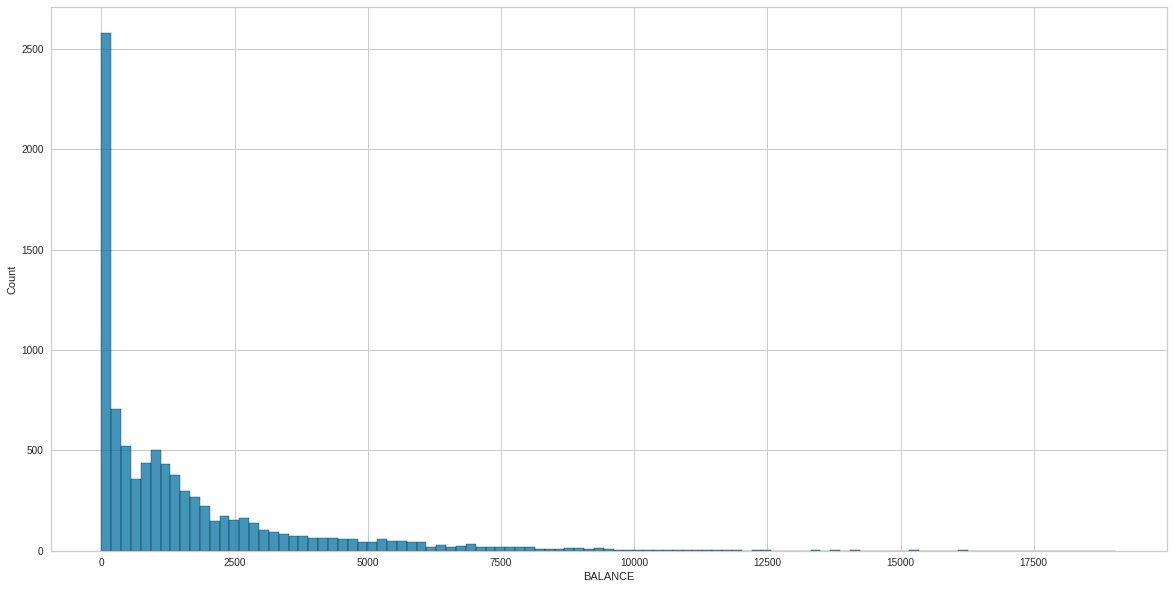

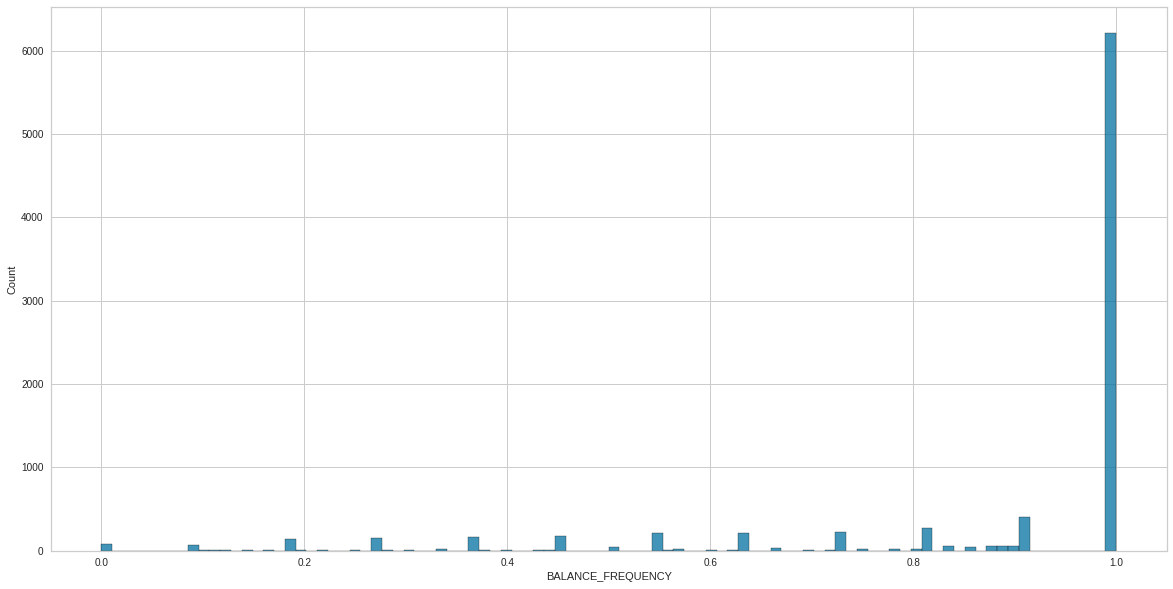

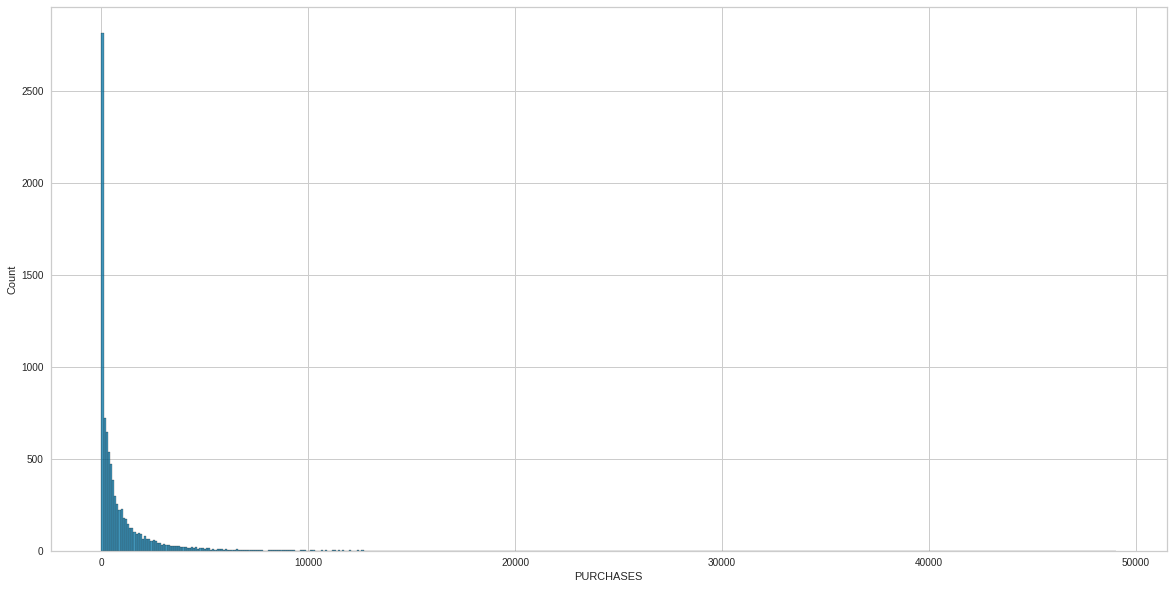

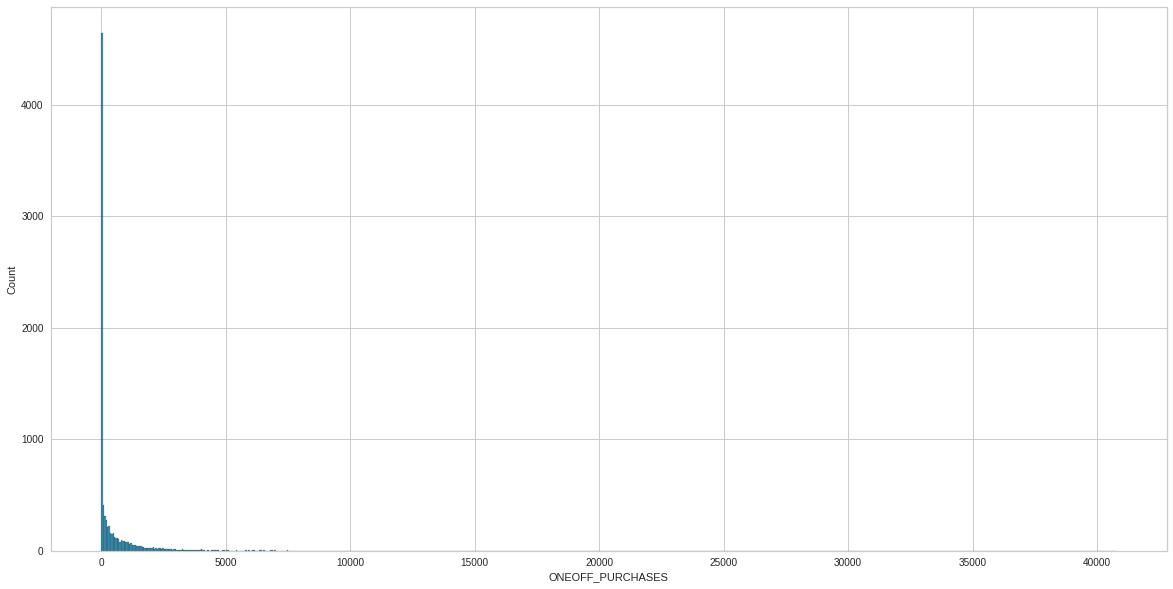

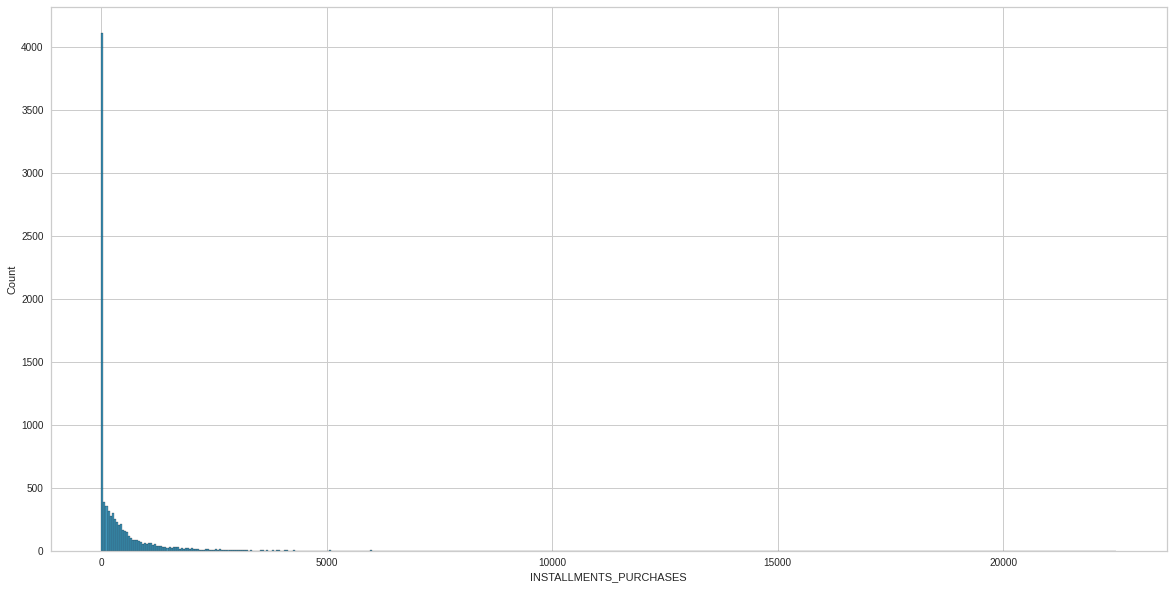

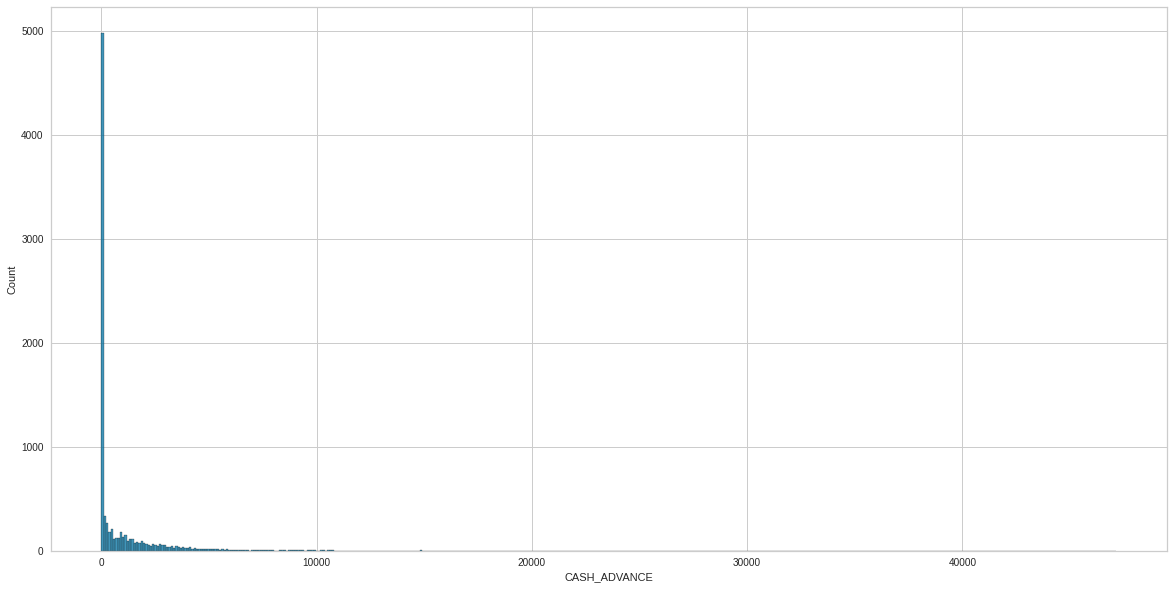

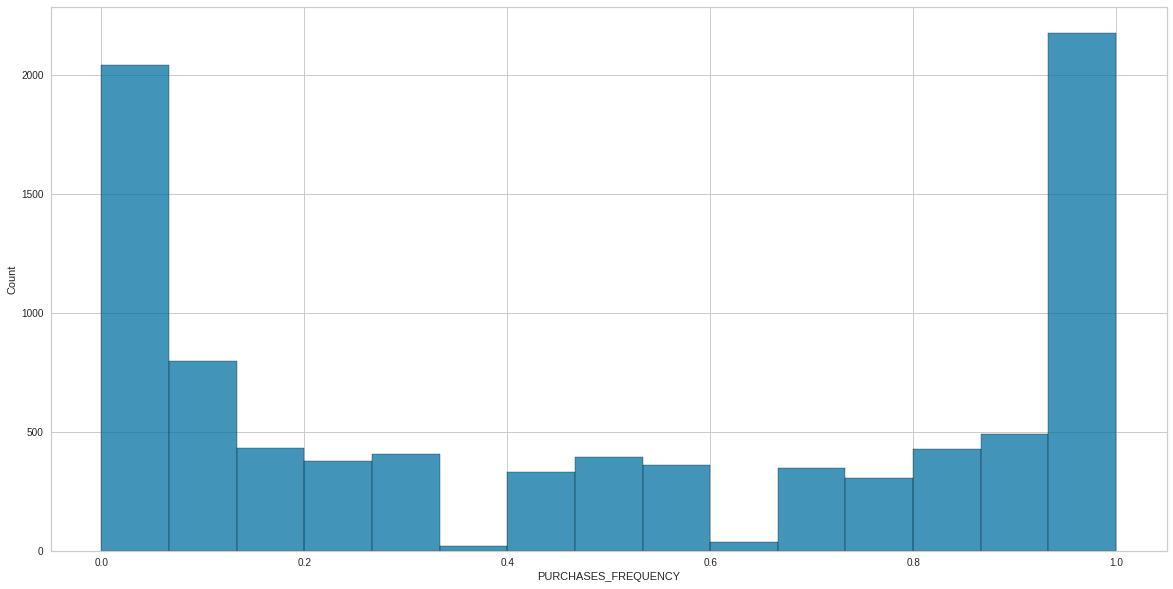

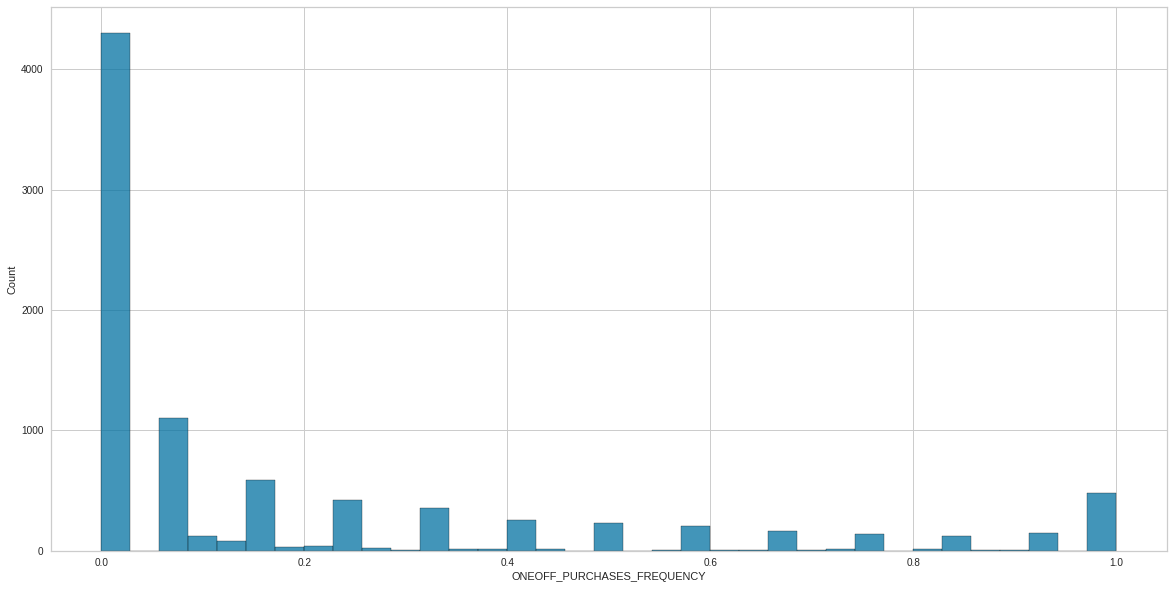

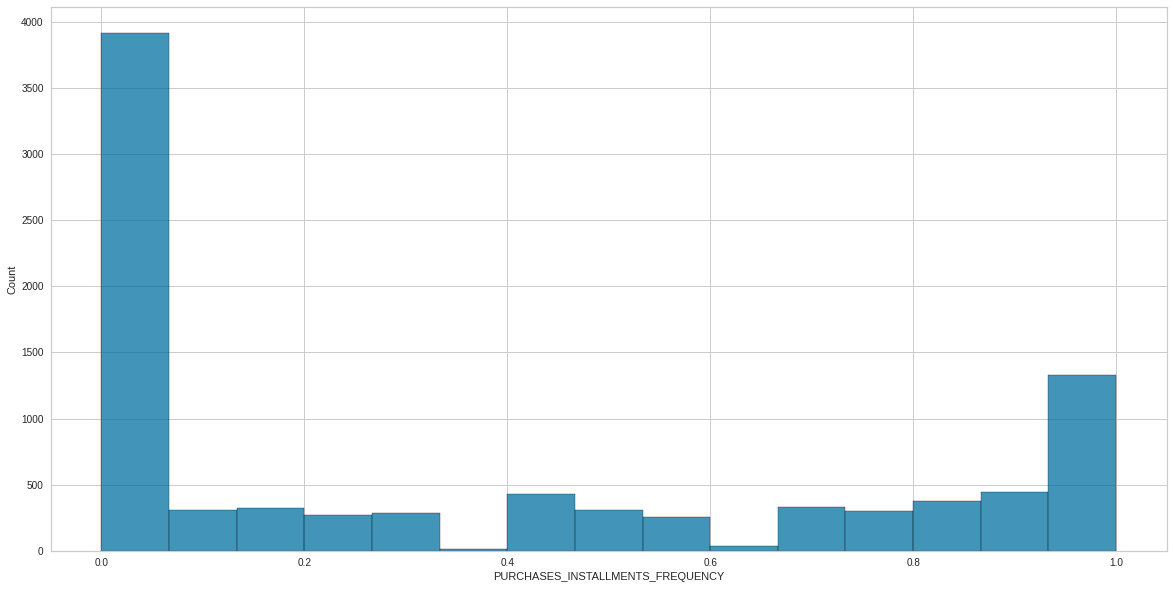

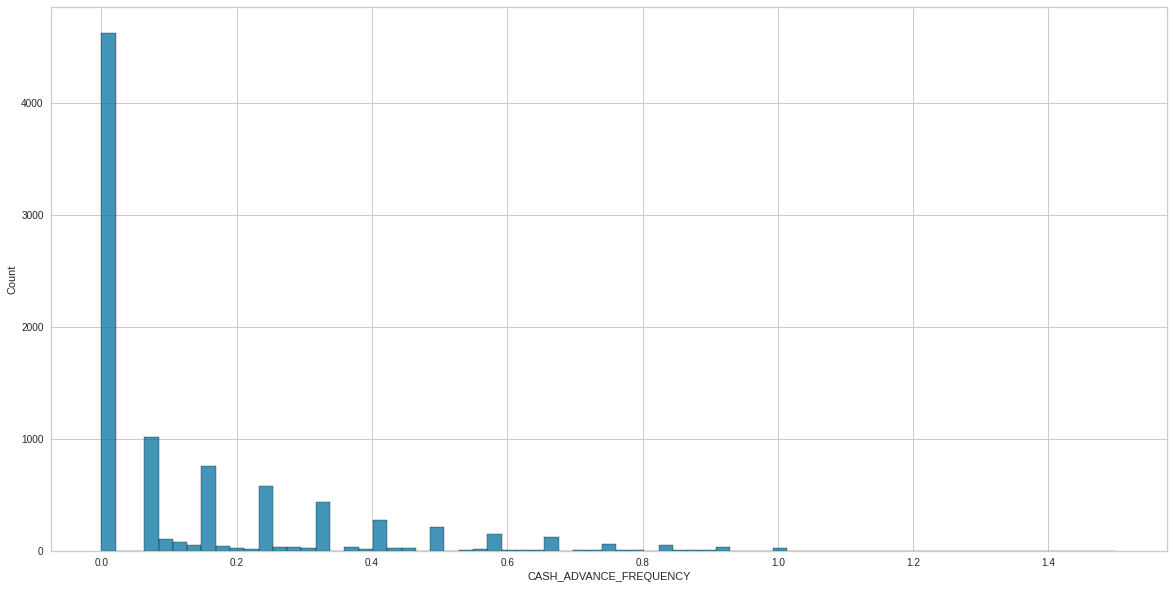

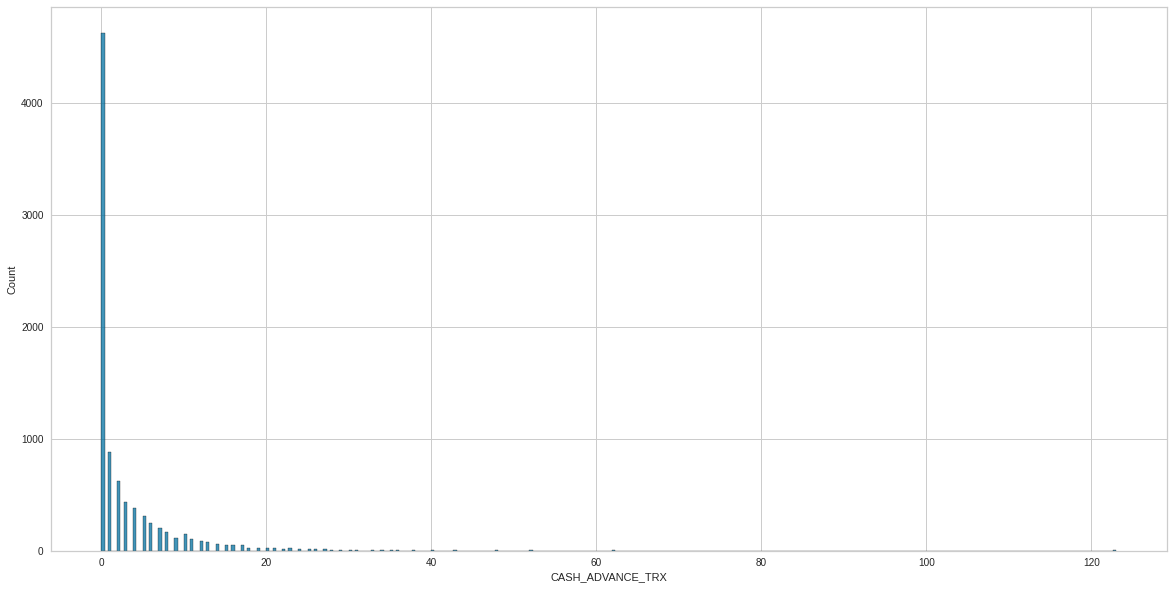

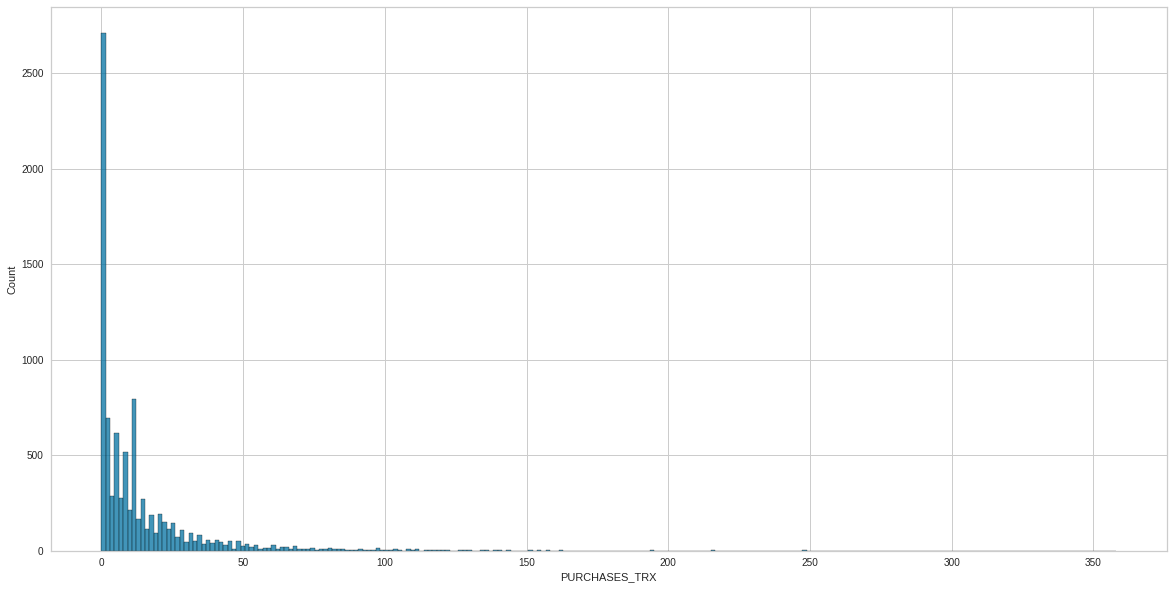

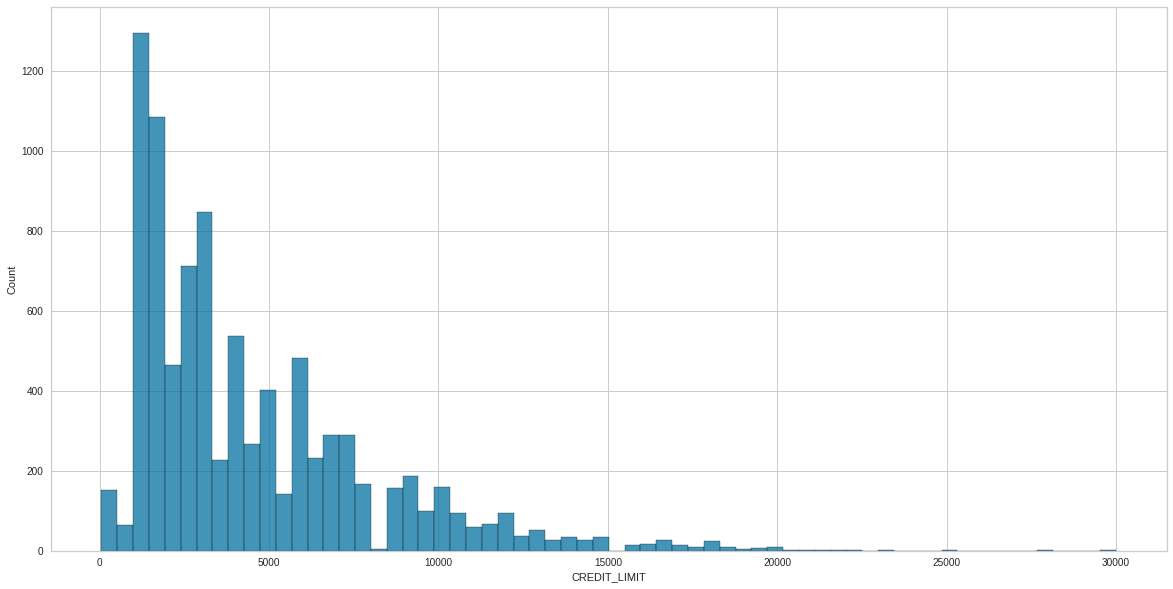

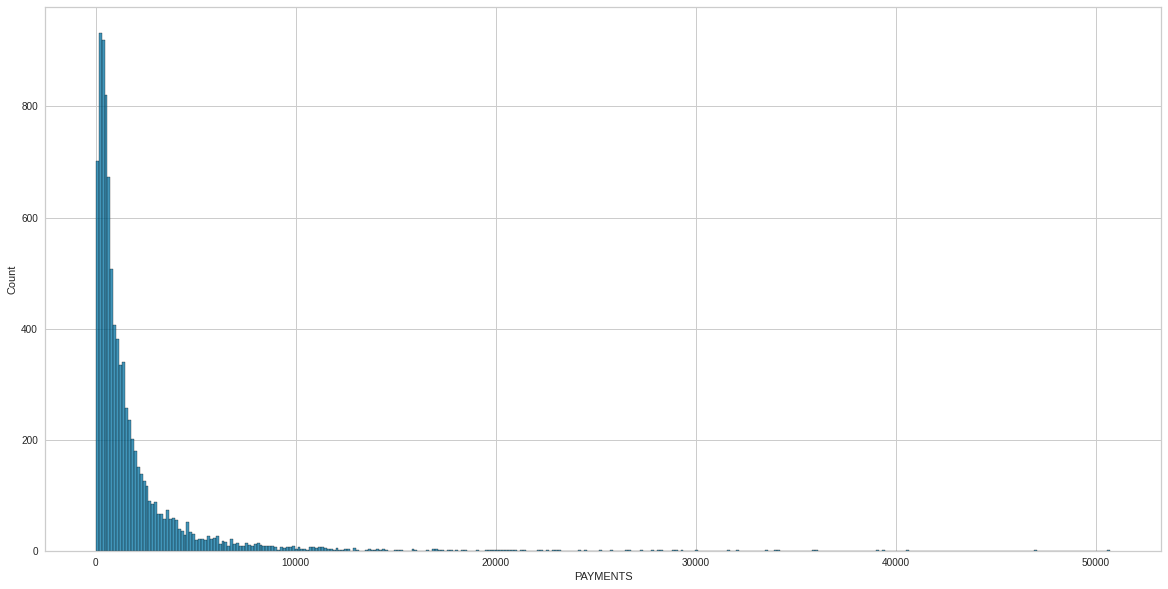

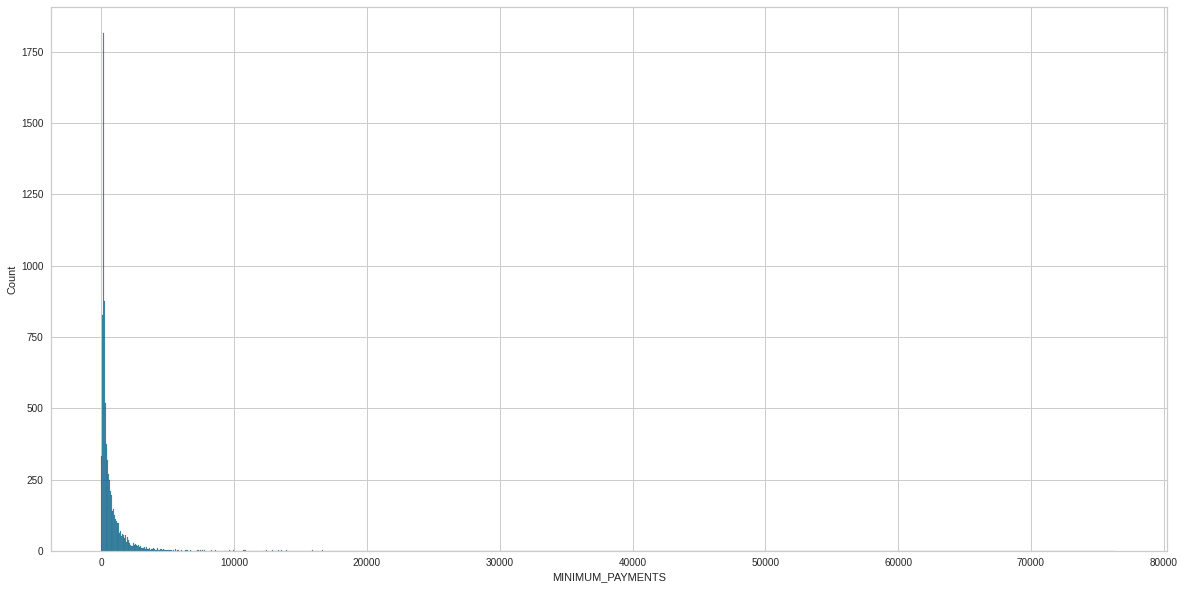

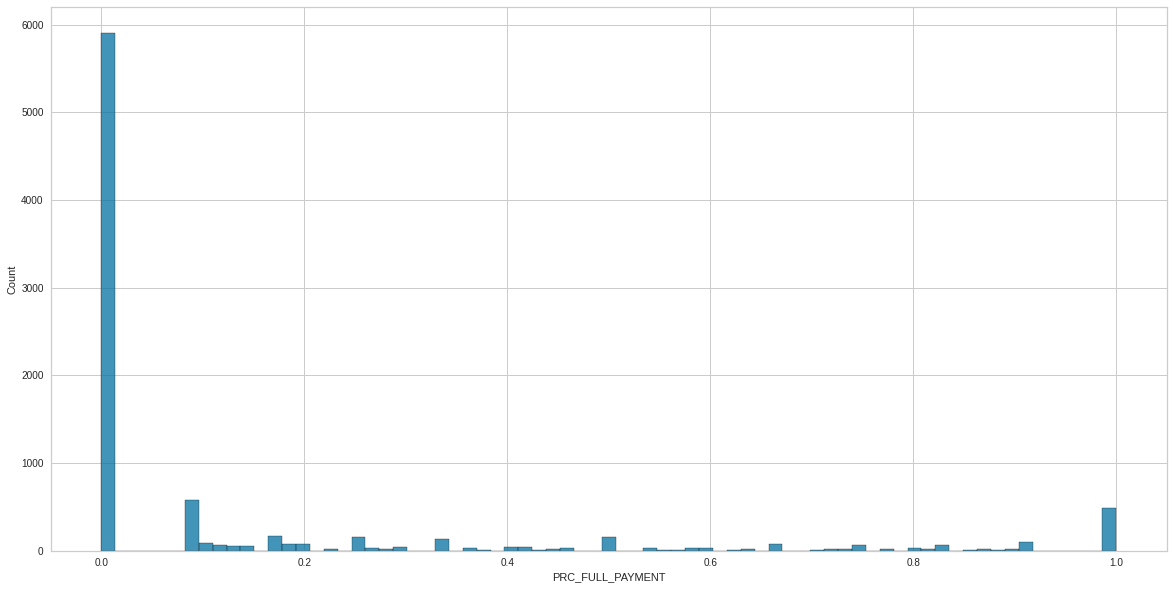

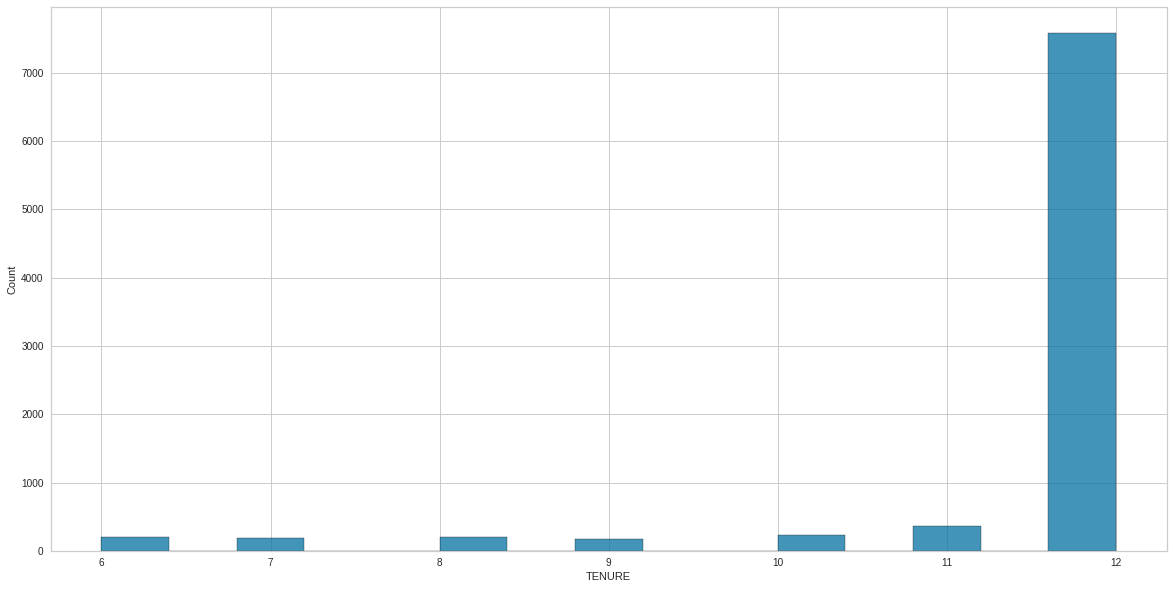

In [ ]:
# Histogram (persebaran data)
for column in X.columns:
    plt.figure(figsize = (20,10))
    sns.histplot(X[column])
    plt.show()

Berdasarkan visualisasi diatas, didapatkan beberapa informasi yaitu : 
- Pada fitur "BALANCE", sebagian besar pemegang kartu kredit memiliki batas kredit rendah dan menjaga saldo kredit di bawah 7500

- Orang yang membeli dengan mencicil lebih banyak daripada orang yang membeli sekaligus

- Dalam 6 bulan terakhir, kebanyakan orang telah melakukan pembayaran total di bawah 10.000, dengan pembayaran minimum di bawah 5.000

- Pada fitur "TENURE", sebagian besar pemegang kartu kredit memiliki kartu selama 12 bulan

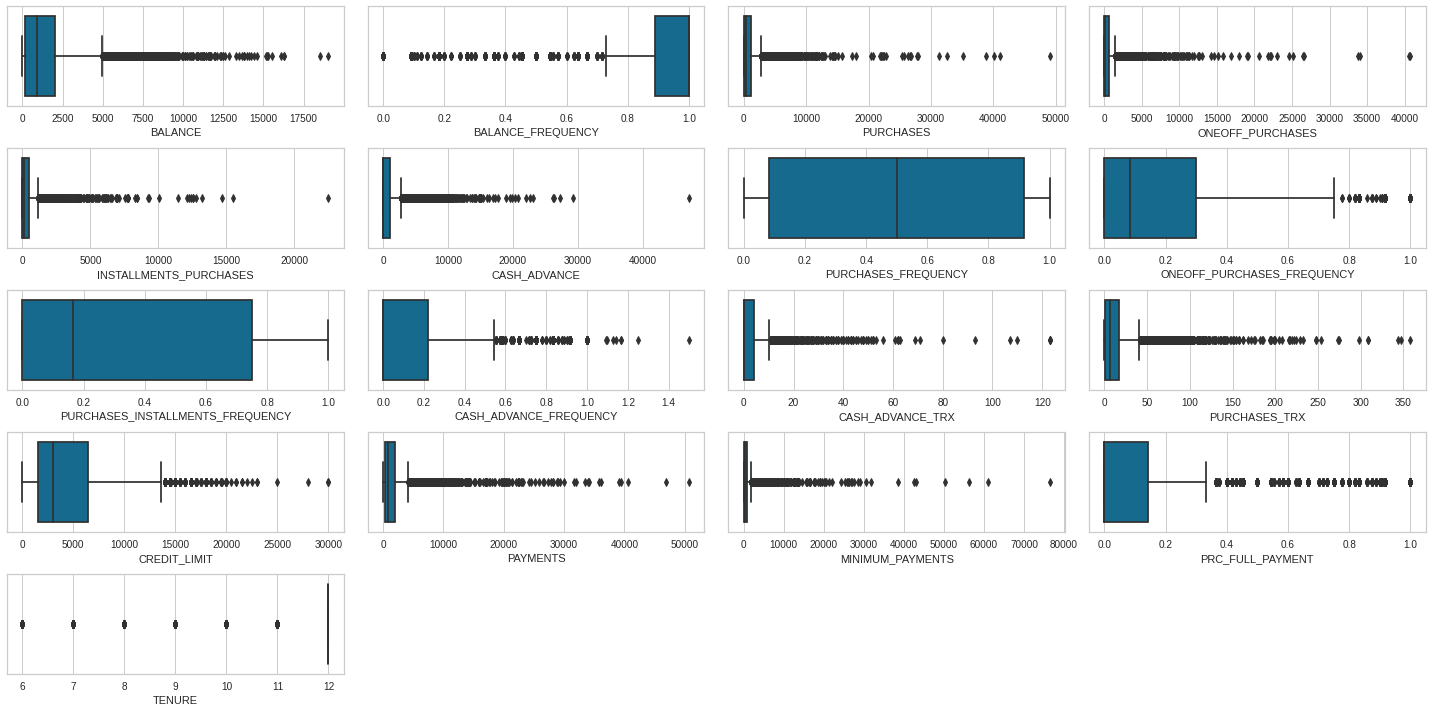

In [ ]:
# Boxplot for outliers 
fig = plt.figure(figsize=(20, 10))
for idx, col in enumerate(X.columns, 1):
    ax = fig.add_subplot(5, 4, idx)
    sns.boxplot(x=X[col], ax=ax)

plt.tight_layout()

Secara visual, terlihat beberapa fitur terdapat outlier. Akan dilakukan proses filtering outlier pada tahap data cleaning.

### Bivariate Analysis

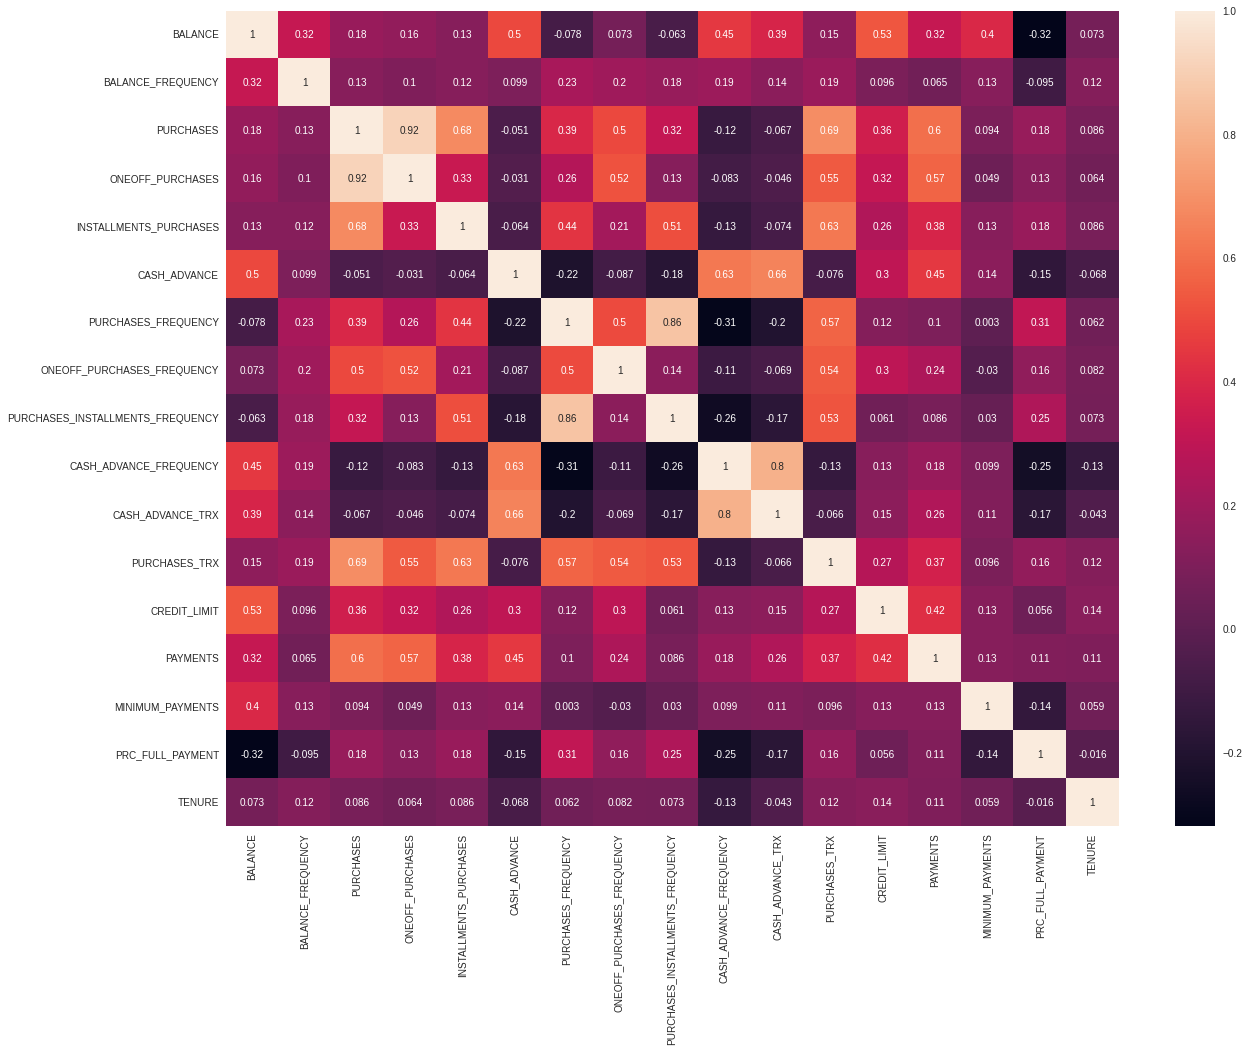

In [ ]:
plt.figure(figsize=(20,15))
corr_df = X.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

Visualisasi diatas digunakan untuk mengetahui korelasi atau hubungan antar kelas, contohnya Fitur Purchases dan Oneoffpurchases sangat berkorelasi dengan nilai sebesar 0.92, yang mana hampir mendekati 1. Hal ini berarti setiap terjadi pembelian maka kemungkinan pembelian maksimum dilakukan dalam sekali jalan tinggi.

# Data Cleaning

## Drop Features

In [ ]:
df = df.drop(['CUST_ID'],axis = 1)
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Kolom "CUST_ID" pada dataset di drop, dikarenakan berbentuk kategorikal yang dinilai tidak relevan untuk kasus klaster

## Handling Outliers

In [ ]:
for column in df.columns:
    data = df[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan
    
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

Pada bagian eksplorasi Data terdapat banyak nilai outlier, nilai tersebut harus diatasi agar tidak mempengaruhi model nantinya

Daripada menghilangkan nilai outlier tersebut, kami mengganti nilai outlier tersebut menjadi nilai NaN, untuk nanti diisikan dengan nilai lain

## Filling Missing Values

In [ ]:
df = df.fillna(df.mean())

In [ ]:
# Again check for null values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Nilai Outlier yang telah diganti menjadi nilai NaN dan Nilai NaN yang terdapat pada dataset, diisi dengan nilai mean (rata-rata)

# Data Preprocessing

## Normalizing the Data

Pada tahap ini, kami melakukan normalisasi atau standarisasi terhadap dataset dengan **Standard Scaler**. Standarisasi Data dilakukan untuk membuat jarak data antar variabelnya setara

In [ ]:
X = df.values[:,0:]
scaler = StandardScaler()
Clus_dataSet = pd.DataFrame(scaler.fit_transform(X),columns=df.columns)
Clus_dataSet

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.920914,-2.610609e+00,-0.717855,-6.477389e-01,-0.388691,-6.161729e-01,-0.806490,-7.006888e-01,-0.707313,-0.733648,-0.668542,-0.727467,-1.055229,-0.951857,-7.963325e-01,-4.884012e-01,0.0
1,1.850586,-1.082644e+00,-0.871618,-6.477389e-01,-0.737921,-2.641488e-16,-1.221758,-7.006888e-01,-0.916995,1.113448,0.970691,-0.939117,0.954413,3.344316,1.659821e+00,2.703337e+00,0.0
2,1.230535,4.453216e-01,0.374553,1.677843e+00,-0.737921,-6.161729e-01,1.269843,1.041921e-14,-0.916995,-0.733648,-0.668542,0.330780,1.121883,-0.489047,4.879846e-01,-4.884012e-01,0.0
3,0.504272,1.772721e-13,1.544422,-1.538790e-15,-0.737921,-2.974103e-01,-1.014125,-2.537958e-01,-0.916995,-0.117952,-0.258734,-0.833292,1.121883,-1.174089,7.483468e-16,-4.884012e-01,0.0
4,-0.239942,4.453216e-01,-0.845829,-5.996133e-01,-0.737921,-6.161729e-01,-1.014125,-2.537958e-01,-0.916995,-0.733648,-0.668542,-0.833292,-0.988241,-0.427083,-5.191252e-01,-4.884012e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.931790,4.453216e-01,-0.402400,-6.477389e-01,0.327781,-6.161729e-01,1.269843,-7.006888e-01,1.179833,-0.733648,-0.668542,-0.304168,-1.055229,-0.815533,-1.034945e+00,2.192568e-15,0.0
8946,-0.939952,4.453216e-01,-0.388087,-6.477389e-01,0.360288,-6.161729e-01,1.269843,-7.006888e-01,1.179833,-0.733648,-0.668542,-0.304168,-1.055229,-0.870301,7.483468e-16,-4.884012e-01,0.0
8947,-0.936257,-2.355956e+00,-0.638878,-6.477389e-01,-0.209317,-6.161729e-01,0.854576,-7.006888e-01,0.760469,-0.733648,-0.668542,-0.409993,-1.055229,-1.084591,-9.466548e-01,3.102308e+00,0.0
8948,-0.944971,-2.355956e+00,-0.871618,-6.477389e-01,-0.737921,-5.595439e-01,-1.221758,-7.006888e-01,-0.916995,0.497752,0.151075,-0.939117,-1.222699,-1.116219,-1.016858e+00,3.102308e+00,0.0


## Dimension Reduction (PCA)

Pada tahap ini, kami mereduksi Dimensi dengan menerapkan PCA dan n_component = 2. Hal ini berarti, dilakukan reduksi dari dataset yang sebelumnya 17 dimensi menjadi 2 dimensi, dimana 2 dimensi tersebut mewakili nilai-nilai dari 17 dimensi.

In [ ]:
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(Clus_dataSet)
pca_df_scale = pd.DataFrame(pca_scale, columns=['principal component 1','principal component 2'])
pca_df_scale.head()

,principal component 1,principal component 2
0,-0.988735,-2.916514
1,-2.415353,2.076210
2,0.832104,0.911686
3,-0.821250,-0.005518
4,-1.296223,-1.883242


In [ ]:
print('Explained variation per principal component : ')
print(pca.explained_variance_ratio_)

Explained variation per principal component : 
[0.27462864 0.17267633]


Hasil reduksi dimensi 17 menjadi dimensi 2
- Principal component 1 : Mewakili 27% dari keseluruhan data
- Principal component 2 : Mewakili 17% dari keseluruhan data

Gabungan dari 2 dimensi tersebut mewakili 44% dari kesuluruhan data

# Modeling

## Elbow Method

Elbow Method merupakan suatu metode yang digunakan untuk menghasilkan informasi berupa visualisasi, sehingga dapat menentukan jumlah cluster terbaik.

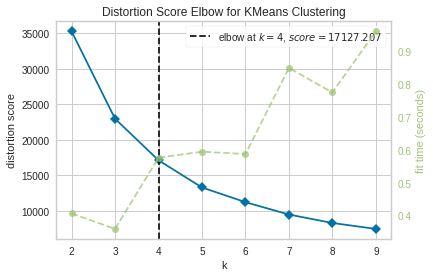

In [ ]:
pca_model = KMeans()
visualizer = KElbowVisualizer(pca_model, k=(2,10))

visualizer.fit(pca_df_scale)
visualizer.show()

Berdasarkan visualisasi diatas, nilai kluster paling efektif yaitu 4, dengan score = 17122.955

## K-Means Clustering

Alasan kami memilih K-means Clustering karena salah satu “unsupervised machine learning algorithms” yang paling sederhana. K-means clustering ini merupakan salah satu metode cluster analysis non hirarki yang berusaha untuk mempartisi objek yang ada kedalam satu atau lebih cluster atau kelompok objek berdasarkan karakteristiknya, sehingga objek yang mempunyai karakteristik yang sama dikelompokan dalam satu cluster yang sama dan objek yang mempunyai karakteristik yang berbeda dikelompokan kedalam cluster yang lain.

In [ ]:
clusterNum = 4
k_means_pca = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_pca.fit(pca_df_scale)
labels = k_means_pca.labels_
print(labels)

[1 2 0 ... 1 1 0]


# Model Evaluation

Untuk evaluasi terhadap clustering, kami menggunakan Silhouette Score dan Visualisasi dari cluster. Silhouette Score ini digunakan untuk mengetahui akurasi, sedangkan visualisasi untuk mengetahui apakah pembagian cluster sudah baik.

In [ ]:
# Menggabungkan dataset dengan label
df['label']= labels
Clus_dataSet['label']=labels
pca_df_scale['label']=labels

**Silhouette Score**

In [ ]:
print(f'Silhouette Score:', silhouette_score(pca_df_scale,labels))

Silhouette Score: 0.5059011216757646


Hasil Silhouette Score sebesar 50,5 %

**Visualisasi Cluster**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


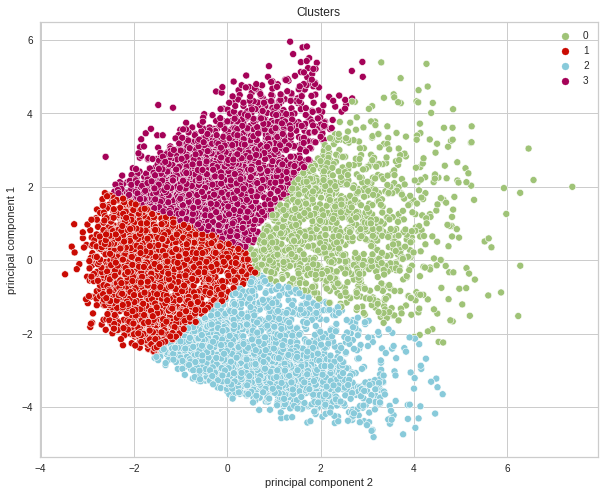

In [ ]:
x_axis = pca_df_scale['principal component 2']
y_axis = pca_df_scale['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = labels, palette = ['g','r','c','m'])
plt.title('Clusters')
plt.show()

Pada Visualisasi bisa dilihat terdapat 4 klaster dari hasil training model dengan data yang telah direduksi dimensinya.

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,40.900749,0.818182,95.40,0.000000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.000000,0.0,397.791343,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2
2,2495.148862,1.000000,773.17,773.170000,0.0,0.000000,1.000000,0.130659,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,1666.670542,0.973505,1499.00,215.349273,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,441.951518,0.000000,12.0,1
4,817.714335,1.000000,16.00,16.000000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1


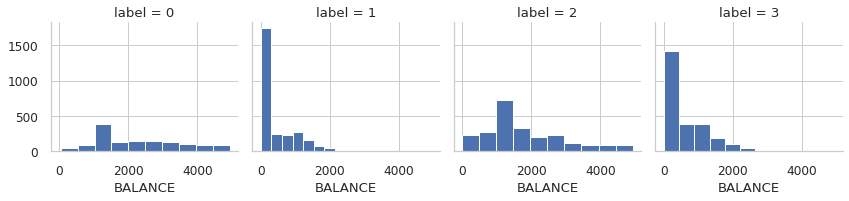

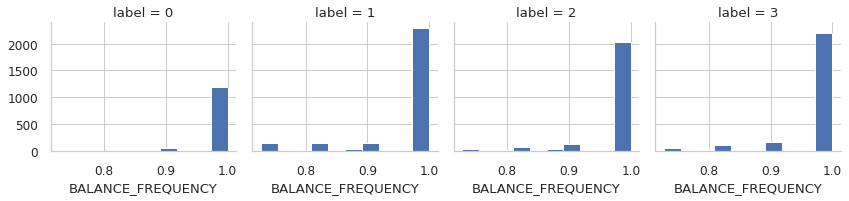

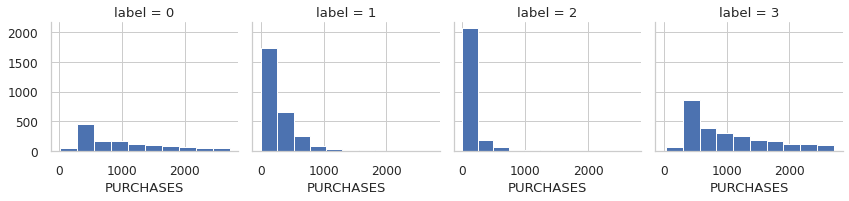

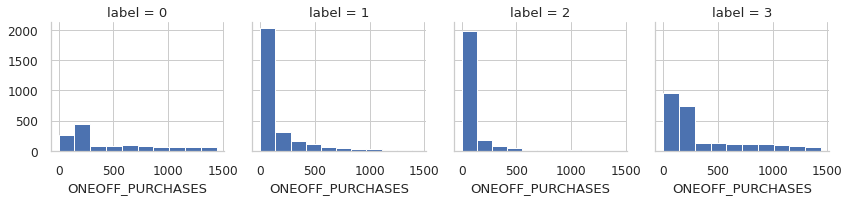

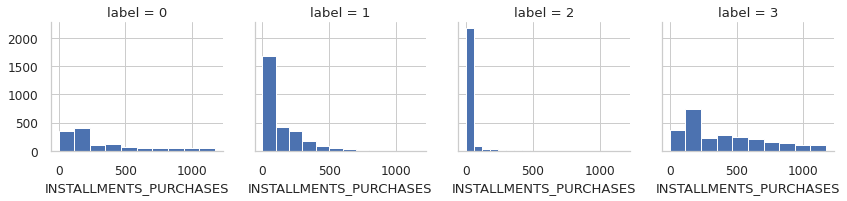

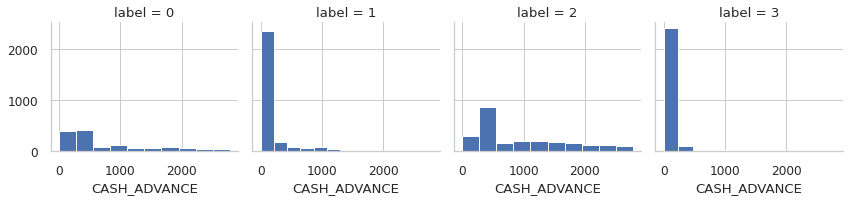

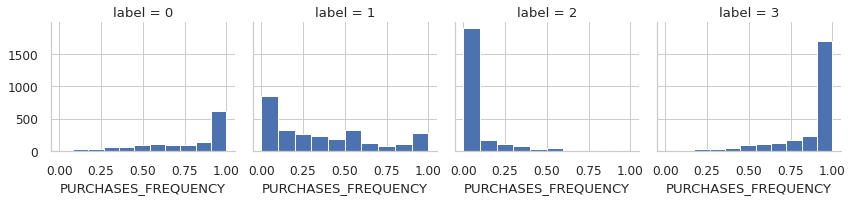

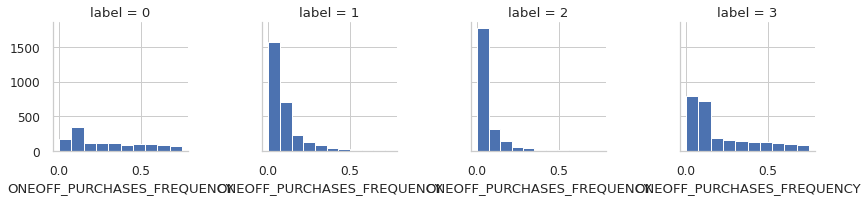

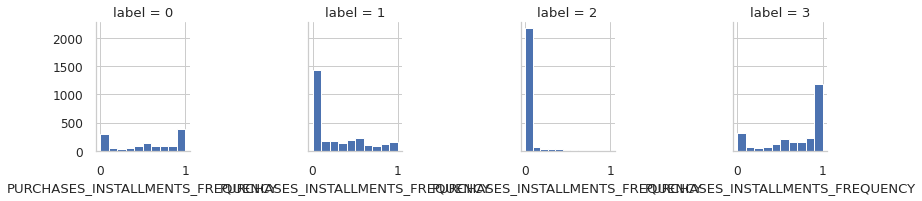

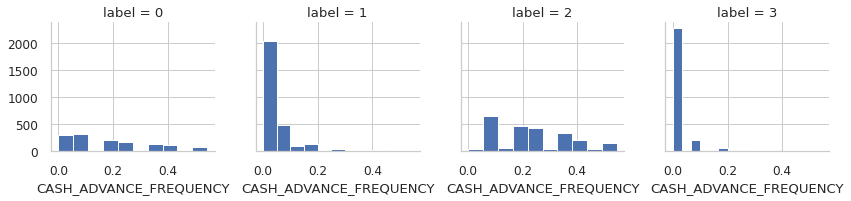

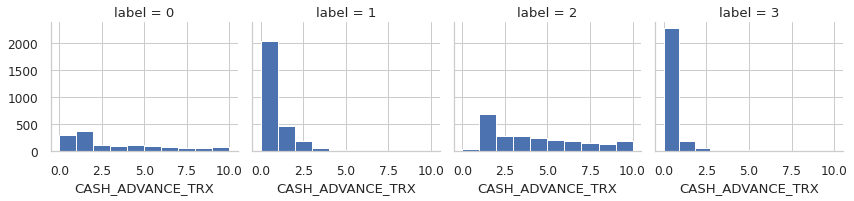

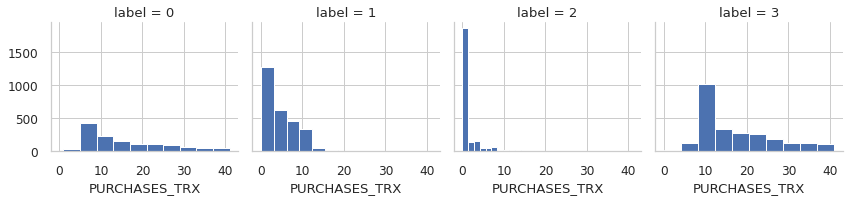

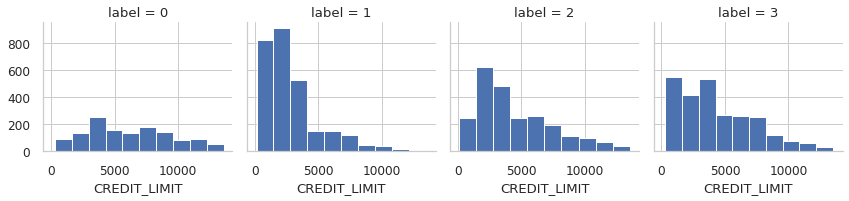

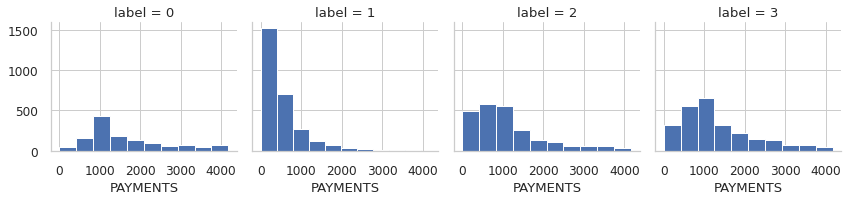

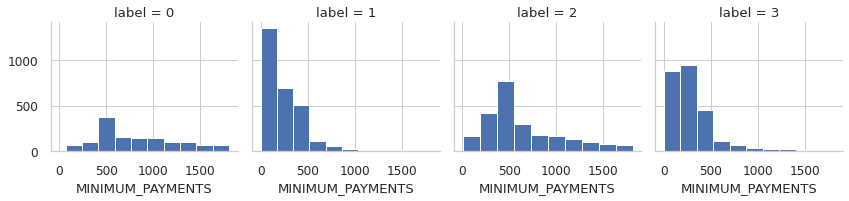

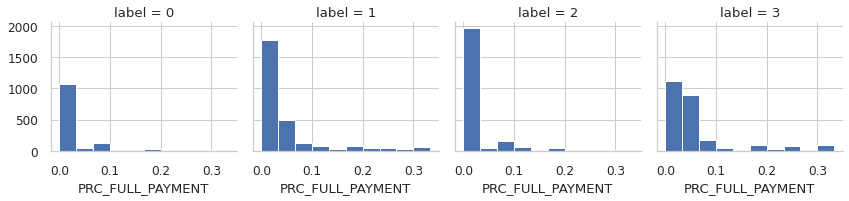

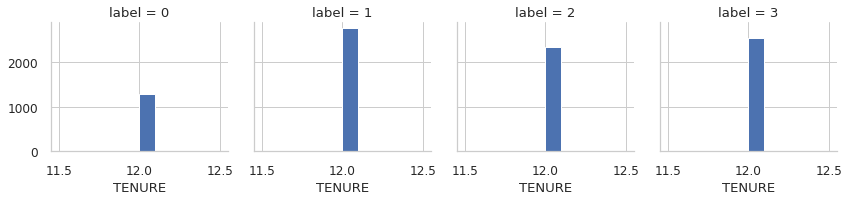

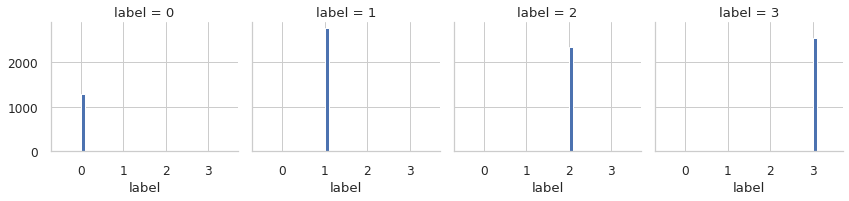

In [ ]:
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize':[10,10]})

for c in df:
    grid = sns.FacetGrid(df, col='label')
    grid.map(plt.hist, c)

Berdasarkan hasil visualisasi diatas, maka deskripsi dari masing - masing label yaitu : 
- Label 0 mewakili pelanggan dengan jumlah uang paling banyak (mereka memiliki saldo terbesar) tetapi tidak memiliki jumlah pembelian yang tinggi dan frekuensi pembelian tinggi.

- Label 1 mewakili pelanggan yang memiliki tidak banyak uang dan tidak suka membelanjakannya.

- Label 2 mewakili pelanggan yang memiliki banyak uang (mereka memiliki jumlah uang terbesar kedua) tetapi takut untuk membelanjakannya.

- Label 3 mewakili pelanggan yang memiliki tidak banyak uang tetapi suka membelanjakannya.

# Model Inferences

In [ ]:
tes = {'BALANCE' : np.random.uniform(-4, 4, size=15),
       'BALANCE_FREQUENCY' : np.random.uniform(-4, 4, size=15),
       'PURCHASES' : np.random.uniform(-4, 4, size=15),
       'ONEOFF_PURCHASES' : np.random.uniform(-4, 4, size=15),
       'INSTALLMENTS_PURCHASES' : np.random.uniform(-4, 4, size=15),
       'CASH_ADVANCE' : np.random.uniform(-4, 4, size=15),
       'PURCHASES_FREQUENCY' : np.random.uniform(-4, 4, size=15),
       'ONEOFF_PURCHASES_FREQUENCY' : np.random.uniform(-4, 4, size=15),
       'PURCHASES_INSTALLMENTS_FREQUENCY' : np.random.uniform(-4, 4, size=15),
       'CASH_ADVANCE_FREQUENCY' : np.random.uniform(-4, 4, size=15),
       'CASH_ADVANCE_TRX' : np.random.uniform(-4, 4, size=15),
       'PURCHASES_TRX' : np.random.uniform(-4, 4, size=15),
       'CREDIT_LIMIT' : np.random.uniform(-4, 4, size=15),
       'PAYMENTS' : np.random.uniform(-4, 4, size=15),
       'MINIMUM_PAYMENTS' : np.random.uniform(-4, 4, size=15),
       'PRC_FULL_PAYMENT' : np.random.uniform(-4, 4, size=15),
       'TENURE' : np.random.uniform(-4, 4, size=15),
       }

test = pd.DataFrame(data=tes)

Data Testing untuk Model dibuat menggunakan numpy array dengan range angka : -4 sampai 4 

In [ ]:
test.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.934139,1.024453,-3.666405,-3.802655,-3.166790,-3.908004,-1.999173,0.533464,2.690470,0.729287,-0.422956,-2.574172,-3.886653,-2.409086,1.557512,3.084167,-1.198812
1,2.697102,-0.470892,1.106247,1.370079,3.581357,-2.992462,1.733267,-2.222555,-2.281756,0.624929,0.537274,3.149401,0.141456,-0.370049,-0.933523,-2.403935,-0.841930
2,-0.430718,3.895203,-2.559119,-3.898152,-1.332506,-1.417681,3.260049,1.867384,2.238221,1.093402,-3.480963,-2.948599,3.558684,-1.105337,2.802024,-3.928230,1.039309
3,2.081015,2.809856,-1.215982,1.531034,1.899845,0.937195,3.489239,-1.004320,-0.865508,-3.076705,3.394205,-1.586727,-0.667305,-3.988411,-2.529767,3.309855,-0.976075
4,-0.818193,1.736696,0.080401,-0.649468,-0.531211,3.864712,1.016000,3.761551,-2.345115,-2.538289,-0.537231,-1.991397,1.785876,-3.449311,-2.167421,-1.080289,-3.580352


In [ ]:
x_test = pca.transform(test)

Data test tersebut direduksi dimensinya dari 17 dimensi menjadi 2 dimensi

In [ ]:
prediksi = k_means_pca.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
prediksi

array([1, 3, 1, 1, 1, 2, 1, 3, 0, 3, 2, 2, 0, 1, 0], dtype=int32)

Nilai dari testing model disimpan kedalam variabel prediksi

# Save model in pickle file

In [ ]:
# simpan model kedalam file dengan pickle
import pickle
pickle.dump(k_means_pca, open('./kmeans_model.pkl','wb'))

In [ ]:
pickle.dump(pca, open('./pca_model.pkl','wb'))

Model Disimpan dalam bentuk file pickle yang nantinya akan digunakan untuk deployment model

# Conclusion

Project Klustering menggunakan Dataset "Credit Data" yang memiliki 17 Dimensi(Variabel), untuk mendapatkan hasil klastering yang optimal, dilakukan pengurangan dimensi dataset menggunakan teknik PCA (Principal Component Analysis), yaitu dengan menjadikan Dimensi dataset yang awalnya 17 Dimensi menjadi diwakilkan oleh 2 dimensi saja

Setelah dilakukan pereduksian dimensi, proses klastering dilakukan terhadap data hasil pereduksian, Hasilnya didapatkan silhouette Score sebesar 50,5 % serta berhasil mendapatkan 4 klaster pada dataset tersebut dengan rincian sebagai berikut : 

- Label 0 (Hijau) mewakili pelanggan dengan jumlah uang paling banyak (mereka memiliki saldo terbesar) tetapi tidak memiliki jumlah pembelian yang tinggi dan frekuensi pembelian tinggi.

- Label 1 (Merah) mewakili pelanggan yang memiliki tidak banyak uang dan tidak suka membelanjakannya.

- Label 2 (Biru) mewakili pelanggan yang memiliki banyak uang (mereka memiliki jumlah uang terbesar kedua) tetapi takut untuk membelanjakannya.

- Label 3 (Ungu) mewakili pelanggan yang memiliki tidak banyak uang tetapi suka membelanjakannya.